Comparaison des peroformences de classification de l'ensemble des models 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from io import StringIO
import sys
from deepul_helper.demos import load_model_and_data, evaluate_accuracy


In [ ]:
model_names = ['context_encoder', 'rotation', 'simclr']
results = []

for model_name in tqdm(model_names, desc="Évaluation des modèles"):
    model, linear_classifier, train_loader, test_loader = load_model_and_data(model_name)
    
    # Redirection de la sortie pour capturer les résultats d'évaluation
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    
    # Évaluation du modèle (affichage capturé)
    evaluate_accuracy(model, linear_classifier, train_loader, test_loader)
    
    # Rétablir la sortie standard
    sys.stdout = old_stdout
    
    # Extraire les résultats de la sortie capturée
    output = mystdout.getvalue()
    
    # Initialiser les valeurs de précision
    train_accuracy = None
    test_accuracy = None
    
    # Extraire les précisions de la sortie capturée
    lines = output.splitlines()
    for i, line in enumerate(lines):
        if "Train Set" in line:
            next_line = lines[i + 1] if i + 1 < len(lines) else ""
            if "Top 1 Accuracy:" in next_line:
                train_accuracy = float(next_line.split(":")[1].strip().split(",")[0])
        elif "Test Set" in line:
            next_line = lines[i + 1] if i + 1 < len(lines) else ""
            if "Top 1 Accuracy:" in next_line:
                test_accuracy = float(next_line.split(":")[1].strip().split(",")[0])
    
    # Ajouter les résultats pour chaque modèle
    results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })


Affichage des resultats pour comparaison DATA FRAME + GRAPHIQUE


In [ ]:
# Dataframe
import pandas as pd
df_results = pd.DataFrame(results)
styled_df = df_results.style.set_caption("Comparaison des Performances de Classification des Modèles") \
                             .format({"Train Accuracy": "{:.2f}%", "Test Accuracy": "{:.2f}%"}) \
                             .highlight_max(color="lightgreen", subset=["Train Accuracy", "Test Accuracy"]) \
                             .highlight_min(color="lightcoral", subset=["Train Accuracy", "Test Accuracy"])
styled_df

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



bar_width = 0.35
index = np.arange(len(df_results['Model']))


plt.figure(figsize=(12, 8))
train_bars = plt.bar(index - bar_width / 2, df_results['Train Accuracy'], bar_width, color='skyblue', label='Train Set')
test_bars = plt.bar(index + bar_width / 2, df_results['Test Accuracy'], bar_width, color='lightgreen', label='Test Set')

for bar in train_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='blue')
for bar in test_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='green')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Comparaison des performances de classification des modèles', fontsize=14)
plt.xticks(index, df_results['Model'], fontsize=11)
plt.legend()
plt.tight_layout()
plt.show()


Parmi les trois modèles, SimCLR est le plus performant, avec des précisions élevées sur les ensembles d'entraînement (90.16%) et de test (92.84%), ce qui démontre des représentations robustes et bien généralisées. Le modèle Rotation montre une stabilité notable, avec des précisions similaires en entraînement (79.60%) et en test (79.91%), indiquant une bonne robustesse sans surapprentissage. En revanche, Context Encoder affiche les performances les plus faibles (53.24% en entraînement et 45.78% en test), ce qui limite son utilité pour la classification.

Programme 1 : Context Encoder avec STL10
Inpainting Examples

Files already downloaded and verified
Epoch [1/40], Loss: 0.0456, Train Accuracy: 0.3685
Test Accuracy: 0.4285
Epoch [2/40], Loss: 0.0312, Train Accuracy: 0.4492
Test Accuracy: 0.4971
Epoch [3/40], Loss: 0.0286, Train Accuracy: 0.4817
Test Accuracy: 0.4555
Epoch [4/40], Loss: 0.0277, Train Accuracy: 0.4924
Test Accuracy: 0.4852
Epoch [5/40], Loss: 0.0267, Train Accuracy: 0.5022
Test Accuracy: 0.4699
Epoch [6/40], Loss: 0.0261, Train Accuracy: 0.5079
Test Accuracy: 0.5055
Epoch [7/40], Loss: 0.0251, Train Accuracy: 0.5180
Test Accuracy: 0.4942
Epoch [8/40], Loss: 0.0247, Train Accuracy: 0.5234
Test Accuracy: 0.5228
Epoch [9/40], Loss: 0.0239, Train Accuracy: 0.5313
Test Accuracy: 0.5229
Epoch [10/40], Loss: 0.0233, Train Accuracy: 0.5382
Test Accuracy: 0.5183
Epoch [11/40], Loss: 0.0223, Train Accuracy: 0.5484
Test Accuracy: 0.5094
Epoch [12/40], Loss: 0.0218, Train Accuracy: 0.5544
Test Accuracy: 0.5151
Epoch [13/40], Loss: 0.0209, Train Accuracy: 0.5642
Test Accuracy: 0.5337
Epoch [14

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04202373..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04202373..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017298196..0.95587975].


Test Accuracy: 0.5297


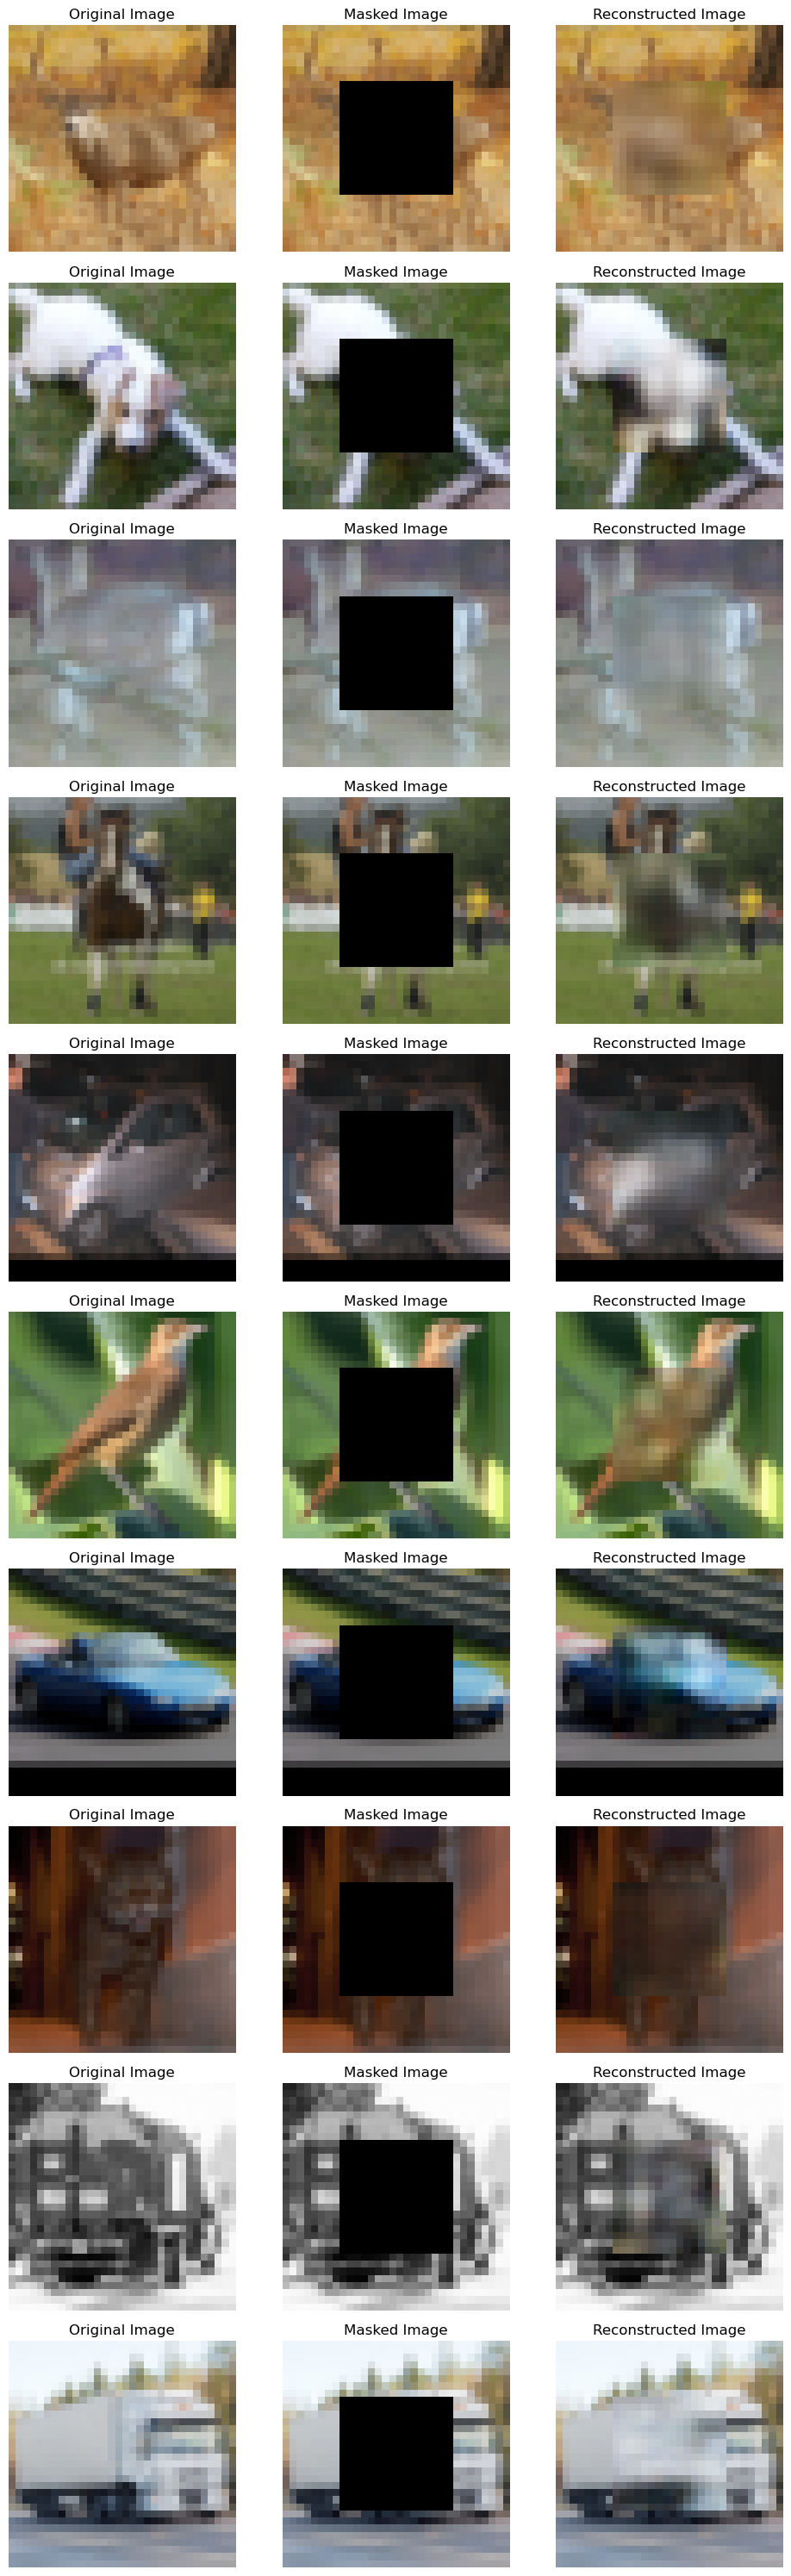

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import STL10
import matplotlib.pyplot as plt
import torch.optim as optim


# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Now use 'device' to move the model to the appropriate hardware
model.to(device)
# Define the SmallSTL10ContextEncoder
class SmallSTL10ContextEncoder(nn.Module):
    def __init__(self):
        super(SmallSTL10ContextEncoder, self).__init__()
        self.latent_dim = 400

        # Encoder for 32x32 images
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, self.latent_dim, 4)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.BatchNorm2d(self.latent_dim),
            nn.ReLU(),
            nn.ConvTranspose2d(self.latent_dim, 256, 4),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, images):
        images_center = images[:, :, 8:24, 8:24].clone()
        images_masked = images.clone()
        images_masked[:, :, 8:24, 8:24] = 0

        z = self.encoder(images_masked)
        center_recon = self.decoder(z)

        images_reconstructed = images_masked.clone()
        images_reconstructed[:, :, 8:24, 8:24] = center_recon[:, :, 8:24, 8:24]
        return F.mse_loss(center_recon[:, :, 8:24, 8:24], images_center), images_reconstructed, images_center, center_recon[:, :, 8:24, 8:24]

# Training function
def train_context_encoder(model, train_loader, test_loader, num_epochs=20, learning_rate=0.0001, threshold=0.1):
    model.to(device)
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        total_loss = 0
        total_accuracy = 0
        for images, _ in train_loader:
            images = images.to(device)
            optimizer.zero_grad()
            loss, _, images_center, center_recon = model(images)
            
            accuracy = ((torch.abs(center_recon - images_center) < threshold).float().mean()).item()
            total_accuracy += accuracy

            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        train_accuracy = total_accuracy / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
        test_accuracy = evaluate_accuracy(model, test_loader, threshold)
        print(f"Test Accuracy: {test_accuracy:.4f}")

# Evaluation function
def evaluate_accuracy(model, data_loader, threshold=0.1):
    model.eval()
    total_accuracy = 0
    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            _, _, images_center, center_recon = model(images)
            accuracy = ((torch.abs(center_recon - images_center) < threshold).float().mean()).item()
            total_accuracy += accuracy
    avg_accuracy = total_accuracy / len(data_loader)
    return avg_accuracy

# Visualization function
def show_context_encoder_inpainting(model, data_loader, num_examples=10):
    model.eval()
    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            _, reconstructions, _, _ = model(images)
            images = images.cpu()
            reconstructions = reconstructions.cpu()
            
            fig, axes = plt.subplots(num_examples, 3, figsize=(10, num_examples * 3))
            for i in range(num_examples):
                axes[i, 0].imshow(images[i].permute(1, 2, 0))
                axes[i, 0].set_title("Original Image")
                axes[i, 0].axis('off')
                
                masked_image = images[i].clone()
                masked_image[:, 8:24, 8:24] = 0
                axes[i, 1].imshow(masked_image.permute(1, 2, 0))
                axes[i, 1].set_title("Masked Image")
                axes[i, 1].axis('off')
                
                axes[i, 2].imshow(reconstructions[i].permute(1, 2, 0))
                axes[i, 2].set_title("Reconstructed Image")
                axes[i, 2].axis('off')
            
            plt.tight_layout()
            plt.show()
            break

# Data preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip()
])
train_data = STL10(root='.', split='train', download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_data = STL10(root='.', split='test', download=False, transform=transform)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

# Initialize and train model
model = SmallSTL10ContextEncoder()
train_context_encoder(model, train_loader, test_loader, num_epochs=40, learning_rate=0.001)
show_context_encoder_inpainting(model, train_loader, num_examples=10)


In [17]:
torch.save(model.state_dict(), 'small_stl10_context_encoder.pth')

Linear Classification

In [18]:
import torch
import torch.nn.functional as F
import torch.nn as nn

class LinearClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Exemple d'initialisation
# Supposons que le modèle ResNet50 extrait 2048 caractéristiques
input_dim = 2048
num_classes = 10  # Par exemple, pour CIFAR-10
classifier = LinearClassifier(input_dim, num_classes)
def accuracy(output, target, topk=(1, 5)):
    """Calculates the Top-1 and Top-5 accuracy."""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    topk_accuracies = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        topk_accuracies.append(correct_k.mul_(100.0 / batch_size))
    return topk_accuracies

def evaluate_stl10_accuracy(encoder, classifier, train_loader, test_loader):
    """Evaluate Top-1 and Top-5 accuracy on STL10 for train and test sets."""
    encoder.eval()
    classifier.eval()

    def evaluate(loader):
        top1_correct, top5_correct = 0, 0
        total = 0
        with torch.no_grad():
            for images, labels in loader:
                images, labels = images.to(device), labels.to(device)

                # Encode images and get the embeddings
                _, embeddings, _, _ = encoder(images)
                embeddings = embeddings.view(embeddings.size(0), -1)

                # Forward pass through the classifier
                outputs = classifier(embeddings)

                # Calculate Top-1 and Top-5 accuracy
                top1_acc, top5_acc = accuracy(outputs, labels, topk=(1, 5))
                top1_correct += top1_acc.item() * labels.size(0) / 100
                top5_correct += top5_acc.item() * labels.size(0) / 100
                total += labels.size(0)

        # Final Top-1 and Top-5 accuracy for the loader
        top1_accuracy = 100 * top1_correct / total
        top5_accuracy = 100 * top5_correct / total
        return top1_accuracy, top5_accuracy

    # Evaluate on train and test sets
    train_acc1, train_acc5 = evaluate(train_loader)
    test_acc1, test_acc5 = evaluate(test_loader)

    # Print the results
    print('Train Set')
    print(f'Top 1 Accuracy: {train_acc1:.2f}%, Top 5 Accuracy: {train_acc5:.2f}%')
    print('Test Set')
    print(f'Top 1 Accuracy: {test_acc1:.2f}%, Top 5 Accuracy: {test_acc5:.2f}%')

modelcontext = SmallSTL10ContextEncoder().to(device)
modelcontext.load_state_dict(torch.load('small_stl10_context_encoder.pth'))

# Initialize the linear classifier
input_dim = 3072  # Adjust this if necessary based on the encoder's output dimension
num_classes = 10  # For STL10 or CIFAR-10
linear_classifier = LinearClassifier(input_dim, num_classes).to(device)

# Evaluate accuracy without training
evaluate_stl10_accuracy(modelcontext, linear_classifier, train_loader, test_loader)


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_19668\2642579668.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  modelcontext.load_state_dict(torch.load('small_stl10_

Train Set
Top 1 Accuracy: 10.42%, Top 5 Accuracy: 48.02%
Test Set
Top 1 Accuracy: 10.36%, Top 5 Accuracy: 48.52%


Nearest Neighbors

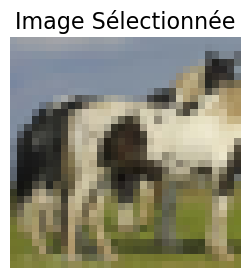

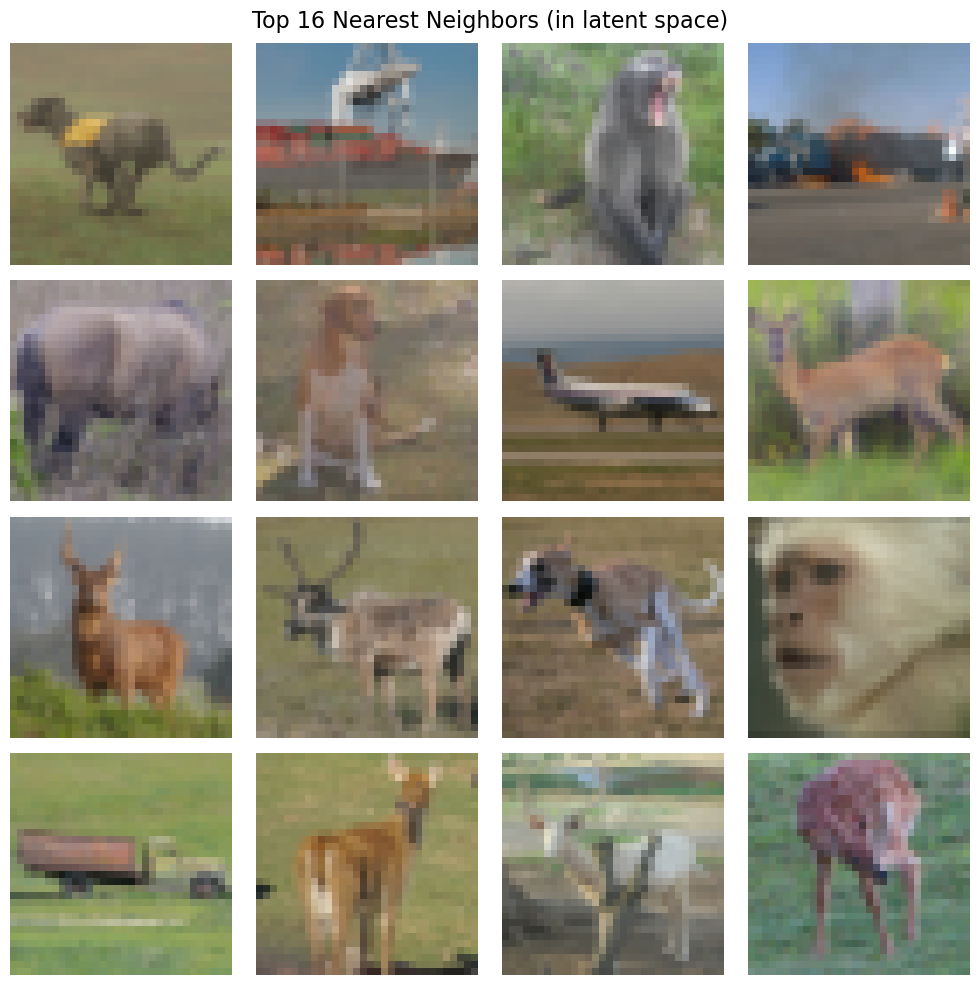

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import torch
import matplotlib.pyplot as plt

def display_nearest_neighbors(encoder, data_loader, n_neighbors=16):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.eval()
    
    embeddings = []
    images_list = []
    
    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            embedded = encoder(images)[1] 
            embedded = embedded.view(embedded.size(0), -1) 
            embeddings.append(embedded.cpu())
            images_list.extend(images.cpu())  

    embeddings = torch.cat(embeddings).numpy()
    images_list = torch.stack(images_list)
    selected_index = np.random.choice(len(images_list))
    selected_embedding = embeddings[selected_index].reshape(1, -1)
    nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1).fit(embeddings)
    distances, indices = nbrs.kneighbors(selected_embedding)
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(images_list[selected_index].permute(1, 2, 0).numpy())
    ax.set_title("Image Sélectionnée", fontsize=16)
    ax.axis('off')
    plt.show()
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.suptitle("Top 16 Nearest Neighbors (in latent space)", fontsize=16)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images_list[indices[0, i + 1]].permute(1, 2, 0).numpy())
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
display_nearest_neighbors(model, train_loader)


Programme 2 : Rotation Prediction avec STL10


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# Définir la transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Définir la classe STL10Dataset
class STL10Dataset(Dataset):
    def __init__(self, data_dir, split='train', transform=None):
        self.data_dir = data_dir
        self.split = split
        self.transform = transform

        if split == 'train':
            self.images = read_stl10_binary(f"{data_dir}/train_X.bin", 5000)
            self.labels = np.fromfile(f"{data_dir}/train_y.bin", dtype=np.uint8).astype(int) - 1
        elif split == 'test':
            self.images = read_stl10_binary(f"{data_dir}/test_X.bin", 8000)
            self.labels = np.fromfile(f"{data_dir}/test_y.bin", dtype=np.uint8).astype(int) - 1
        else:
            raise ValueError("Invalid split. Choose between 'train' and 'test'.")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


# Définir la fonction pour lire les fichiers binaires
def read_stl10_binary(file_path, num_images):
    with open(file_path, 'rb') as f:
        images = np.fromfile(f, dtype=np.uint8)
        images = images.reshape(num_images, 3, 96, 96)  # STL-10 a des images de taille 96x96 avec 3 canaux
        images = np.transpose(images, (0, 2, 3, 1))  # Permuter les axes pour obtenir [num_images, H, W, C]
        return images

# Définir la classe RotationPrediction
class RotationPrediction(nn.Module):
    def __init__(self, dataset, n_classes):
        super().__init__()
        if dataset == 'stl10':
            # Load AlexNet from torchvision
            self.model = models.alexnet(pretrained=True)
            self.model.classifier = nn.Sequential(*list(self.model.classifier.children())[:-1])  # Remove the final classification layer
        else:
            raise Exception('Unsupported dataset:', dataset)
        
        self.dataset = dataset
        self.n_classes = n_classes

        # Adjust the classifier layer to match the output size of AlexNet
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4096, n_classes)  # Updated input dimension to 4096
        )

    def forward(self, images):
        batch_size = images.shape[0]
        images, targets = self._preprocess(images)
        targets = targets.to(images.device)

        # Get features from AlexNet
        features = self.model(images)  # This will produce a shape of [batch_size, 4096]
        
        # Forward pass through the classifier
        logits = self.classifier(features)
        
        # Calculate loss and accuracy
        loss = F.cross_entropy(logits, targets)
        pred = logits.argmax(dim=-1)
        correct = pred.eq(targets).float().sum()
        acc = correct / targets.shape[0] * 100.

        return dict(Loss=loss, Acc1=acc)

    def _preprocess(self, images):
        batch_size = images.shape[0]
        images_90 = torch.flip(images.transpose(2, 3), (2,))
        images_180 = torch.flip(images, (2, 3))
        images_270 = torch.flip(images, (2,)).transpose(2, 3)
        images_batch = torch.cat((images, images_90, images_180, images_270), dim=0)
        targets = torch.arange(4).long().repeat(batch_size)
        targets = targets.view(batch_size, 4).transpose(0, 1)
        targets = targets.contiguous().view(-1)
        return images_batch, targets

# Exemple d'utilisation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = './stl10_binary'  # Remplacez par le bon chemin
train_dataset = STL10Dataset(data_dir, split='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initialize the RotationPrediction model
model_rot = RotationPrediction(dataset='stl10', n_classes=4).to(device)

# Run a forward pass to check everything works
for images, labels in train_loader:
    images = images.to(device)
    output = model_rot(images)
    print(output)
    break


c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


{'Loss': tensor(1.7374, device='cuda:0', grad_fn=<NllLossBackward0>), 'Acc1': tensor(26.5625, device='cuda:0')}


Linear Classification 

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Define a fixed linear classifier to evaluate without further training
class FixedLinearClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FixedLinearClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Adjusted accuracy calculation function for Top-1 and Top-5
def accuracy(output, target, topk=(1, 5)):
    maxk = min(max(topk), output.size(1))  # Limit maxk to the number of classes (4)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    topk_accuracies = []
    for k in topk:
        if k > output.size(1):  # Skip Top-k if k exceeds number of classes
            k = output.size(1)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        topk_accuracies.append(correct_k.mul_(100.0 / batch_size))
    return topk_accuracies

# Extract features function
def extract_features(encoder, data_loader):
    encoder.eval()
    features = []
    labels = []
    with torch.no_grad():
        for images, label in data_loader:
            images = images.to(device).float()  # Convertir les images au type float
            feature = encoder.model(images)  # Get features from pre-trained AlexNet
            features.append(feature.cpu())
            labels.append(label.cpu())
    return torch.cat(features), torch.cat(labels)

# Function to evaluate Top-1 and Top-5 accuracy without training
def evaluate_with_fixed_classifier(encoder, classifier, train_loader, test_loader):
    # Extract features from train and test sets
    train_features, train_labels = extract_features(encoder, train_loader)
    test_features, test_labels = extract_features(encoder, test_loader)

    # Set the classifier in eval mode
    classifier.eval()
    
    # Evaluation function
    def evaluate(loader_features, loader_labels):
        outputs = classifier(loader_features.to(device))
        top1, top5 = accuracy(outputs, loader_labels.to(device), topk=(1, 5))
        
        return top1.item(), top5.item()

    # Calculate and print Top-1 and Top-5 accuracy
    train_top1, train_top5 = evaluate(train_features, train_labels)
    test_top1, test_top5 = evaluate(test_features, test_labels)

    print(f"Train Set - Top 1 Accuracy: {train_top1:.2f}%, Top 5 Accuracy (Top-4): {train_top5:.2f}%")
    print(f"Test Set - Top 1 Accuracy: {test_top1:.2f}%, Top 5 Accuracy (Top-4): {test_top5:.2f}%")

# Initialize dataset and model
train_dataset = STL10Dataset(data_dir, split='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = STL10Dataset(data_dir, split='test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the pre-trained RotationPrediction model
model = RotationPrediction(dataset='stl10', n_classes=4).to(device)

# Initialize the fixed linear classifier without additional training
classifier = FixedLinearClassifier(input_dim=4096, num_classes=4).to(device)

# Evaluate Top-1 and Top-5 accuracy with the fixed classifier
evaluate_with_fixed_classifier(model, classifier, train_loader, test_loader) 


Train Set - Top 1 Accuracy: 9.02%, Top 5 Accuracy (Top-4): 40.00%
Test Set - Top 1 Accuracy: 8.93%, Top 5 Accuracy (Top-4): 40.00%


Nearest Neighbors

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.827451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9843137].
Clipping input data to the valid range for imshow with RGB

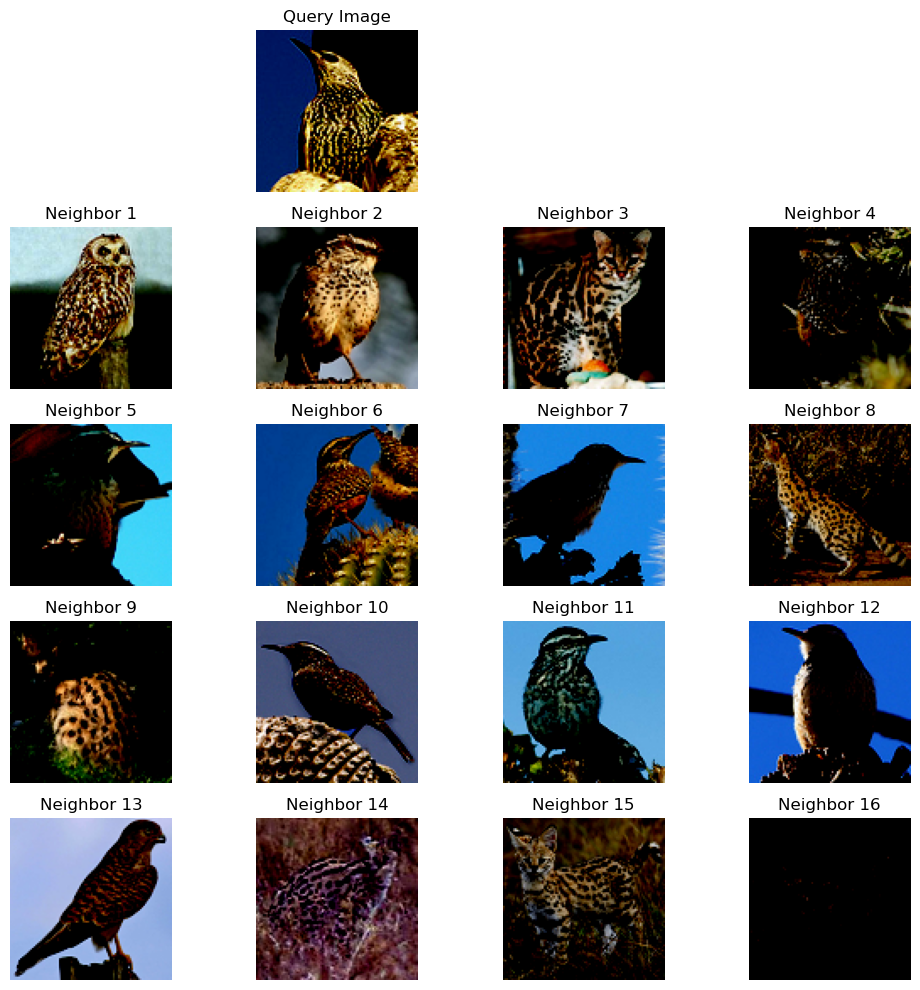

In [8]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Function to extract features for all images in a dataset
def extract_features(encoder, data_loader):
    encoder.eval()
    features = []
    images = []
    with torch.no_grad():
        for img_batch, _ in data_loader:
            img_batch = img_batch.to(device).float()  # Convertir les images en float32
            feature = encoder.model(img_batch)  # Get features from the encoder
            features.append(feature.cpu())
            images.append(img_batch.cpu())
    return torch.cat(features), torch.cat(images)

# Function to find nearest neighbors
def find_nearest_neighbors(encoder, data_loader, num_neighbors=16):
    features, images = extract_features(encoder, data_loader)
    # Normalize features
    features = F.normalize(features, p=2, dim=1)
    
    # Select a random image as the query
    query_idx = torch.randint(0, features.size(0), (1,)).item()
    query_feature = features[query_idx]

    # Compute distances between the query feature and all other features
    distances = torch.mm(features, query_feature.unsqueeze(1)).squeeze(1)
    distances, indices = distances.topk(num_neighbors + 1, largest=True)
    
    # Exclude the query itself from the neighbors list
    neighbors = indices[1:]  # Exclude the first one (query itself)
    return query_idx, neighbors

# Function to visualize the query and its nearest neighbors with 90° rotation
def show_nearest_neighbors(encoder, data_loader, num_neighbors=16):
    query_idx, neighbors = find_nearest_neighbors(encoder, data_loader, num_neighbors)
    
    # Plot query image
    plt.figure(figsize=(10, 10))
    plt.subplot(5, 4, 2)
    plt.imshow(data_loader.dataset[query_idx][0].permute(1, 2, 0).numpy().transpose(1, 0, 2))  # Rotate 90° right
    plt.title("Query Image")
    plt.axis('off')

    # Plot neighbors
    for i, neighbor_idx in enumerate(neighbors):
        plt.subplot(5, 4, i + 5)  # Start plotting neighbors on the next row
        rotated_image = data_loader.dataset[neighbor_idx][0].permute(1, 2, 0).numpy().transpose(1, 0, 2)  # Rotate 90° right
        plt.imshow(rotated_image)
        plt.title(f"Neighbor {i + 1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Définir la transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir en tenseur avec float32
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisation
])

# Initialize data loader
data_dir = './stl10_binary'  # Replace with actual path
dataset = STL10Dataset(data_dir, split='train', transform=transform)
data_loader = DataLoader(dataset, batch_size=64, shuffle=False)

# Initialize the pre-trained RotationPrediction model
model = RotationPrediction(dataset='stl10', n_classes=4).to(device)

# Display nearest neighbors
show_nearest_neighbors(model, data_loader, num_neighbors=16)


Programme 3 : SimCLR avec STL10
SimCLR Model et Linear Classification

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from deepul_helper.resnet import resnet_v1
from deepul_helper.batch_norm import SyncBatchNorm, BatchNorm1d

class SimCLR(nn.Module):
    metrics = ['Loss']
    metrics_fmt = [':.4e']

    def __init__(self, dataset='stl10', n_classes=4, temperature=0.5, projection_dim=128, dist=None):
        super(SimCLR, self).__init__()
        self.temperature = temperature
        self.projection_dim = projection_dim

        # Use ResNet with an appropriate input size for STL-10 images (96x96)
        if dataset == 'stl10':
            resnet = resnet_v1((3, 96, 96), 50, 1, cifar_stem=False)
            resnet = SyncBatchNorm.convert_sync_batchnorm(resnet)
            self.resnet = resnet
            self.latent_dim = 2048
        else:
            raise ValueError("Unsupported dataset. Only 'stl10' is supported in this example.")

        # Projection head
        self.proj = nn.Sequential(
            nn.Linear(self.latent_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim),
            nn.ReLU(inplace=True),
            nn.Linear(self.projection_dim, self.projection_dim, bias=False),
            BatchNorm1d(self.projection_dim, center=False)
        )

        self.dist = dist

    def forward(self, images):
        n = images[0].shape[0]
        xi, xj = images  # Augmented image pair
        hi, hj = self.encode(xi), self.encode(xj)  # (N, latent_dim)
        zi, zj = self.proj(hi), self.proj(hj)      # (N, projection_dim)
        zi, zj = F.normalize(zi), F.normalize(zj)

        # Gathering all pairs for contrastive loss calculation
        zis, zjs = [zi], [zj]
        if self.dist is not None:
            zis = [torch.zeros_like(zi) for _ in range(self.dist.get_world_size())]
            zjs = [torch.zeros_like(zj) for _ in range(self.dist.get_world_size())]
            self.dist.all_gather(zis, zi)
            self.dist.all_gather(zjs, zj)

        z1 = torch.cat((zi, zj), dim=0)            # (2N, projection_dim)
        z2 = torch.cat(zis + zjs, dim=0)           # (2N * n_gpus, projection_dim)
        
        # Similarity matrix calculation
        sim_matrix = torch.mm(z1, z2.t()) / self.temperature
        sim_matrix[torch.arange(n), torch.arange(n)] = -float('inf')  # Masking the diagonal

        targets = torch.arange(2 * n).to(sim_matrix.device).long()
        loss = F.cross_entropy(sim_matrix, targets)
        return dict(Loss=loss), hi

    def encode(self, images):
        """Returns the latent features from ResNet."""
        return self.resnet(images)

    def get_features(self, images):
        """Extract features without applying the projection head, for linear evaluation."""
        return self.resnet(images)


linear classification 

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

# Define the Linear Classifier
class LinearClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Function to evaluate Top-1 and Top-5 accuracy
def accuracy(output, target, topk=(1, 5)):
    maxk = max(topk)
    batch_size = target.size(0)
    
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    
    return [correct[:k].reshape(-1).float().sum(0, keepdim=True).mul_(100.0 / batch_size) for k in topk]

# Function to train the linear classifier
def train_linear_classifier(encoder, classifier, train_loader, num_epochs=10, learning_rate=0.01):
    classifier.train()
    optimizer = optim.Adam(classifier.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).long()  # Convertir les labels en long

            # Get features from the pre-trained SimCLR model
            with torch.no_grad():
                features = encoder.get_features(images)

            # Forward pass
            outputs = classifier(features)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Function to evaluate the classifier
def evaluate_accuracy(encoder, classifier, data_loader):
    classifier.eval()
    top1_accuracy = 0
    top5_accuracy = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)

            # Get features from the pre-trained SimCLR model
            features = encoder.get_features(images)
            
            # Get classifier outputs
            outputs = classifier(features)

            # Calculate Top-1 and Top-5 accuracy
            top1, top5 = accuracy(outputs, labels, topk=(1, 5))
            top1_accuracy += top1.item()
            top5_accuracy += top5.item()
            total += labels.size(0)

    print(f"Top-1 Accuracy: {top1_accuracy / total:.2f}%")
    print(f"Top-5 Accuracy: {top5_accuracy / total:.2f}%")

# Set up the data loaders with transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])

data_dir = './stl10_binary'  # Update with actual path
train_dataset = STL10Dataset(data_dir, split='train', transform=transform)
test_dataset = STL10Dataset(data_dir, split='test', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the SimCLR model and Linear Classifier
input_dim = 2048  # Assuming ResNet-50 feature dimension
num_classes = 10  # STL-10 has 10 classes
simclr_model = SimCLR(dataset='stl10', n_classes=4).to(device)  # Pre-trained SimCLR model
linear_classifier = LinearClassifier(input_dim, num_classes).to(device)

# Train and evaluate the classifier
train_linear_classifier(simclr_model, linear_classifier, train_loader, num_epochs=10, learning_rate=0.01)
print("Train Set Accuracy:")
evaluate_accuracy(simclr_model, linear_classifier, train_loader)
print("Test Set Accuracy:")
evaluate_accuracy(simclr_model, linear_classifier, test_loader)


Epoch [1/10], Loss: 14.6675
Epoch [2/10], Loss: 5.6104
Epoch [3/10], Loss: 6.7266
Epoch [4/10], Loss: 5.8578
Epoch [5/10], Loss: 4.2168
Epoch [6/10], Loss: 3.6680
Epoch [7/10], Loss: 4.8605
Epoch [8/10], Loss: 3.8624
Epoch [9/10], Loss: 3.7675
Epoch [10/10], Loss: 3.9272
Train Set Accuracy:
Top-1 Accuracy: 0.17%
Top-5 Accuracy: 1.22%
Test Set Accuracy:
Top-1 Accuracy: 0.16%
Top-5 Accuracy: 1.13%


Nearest neigbors 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7647059].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9137255..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.94509804..0.90588236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for 

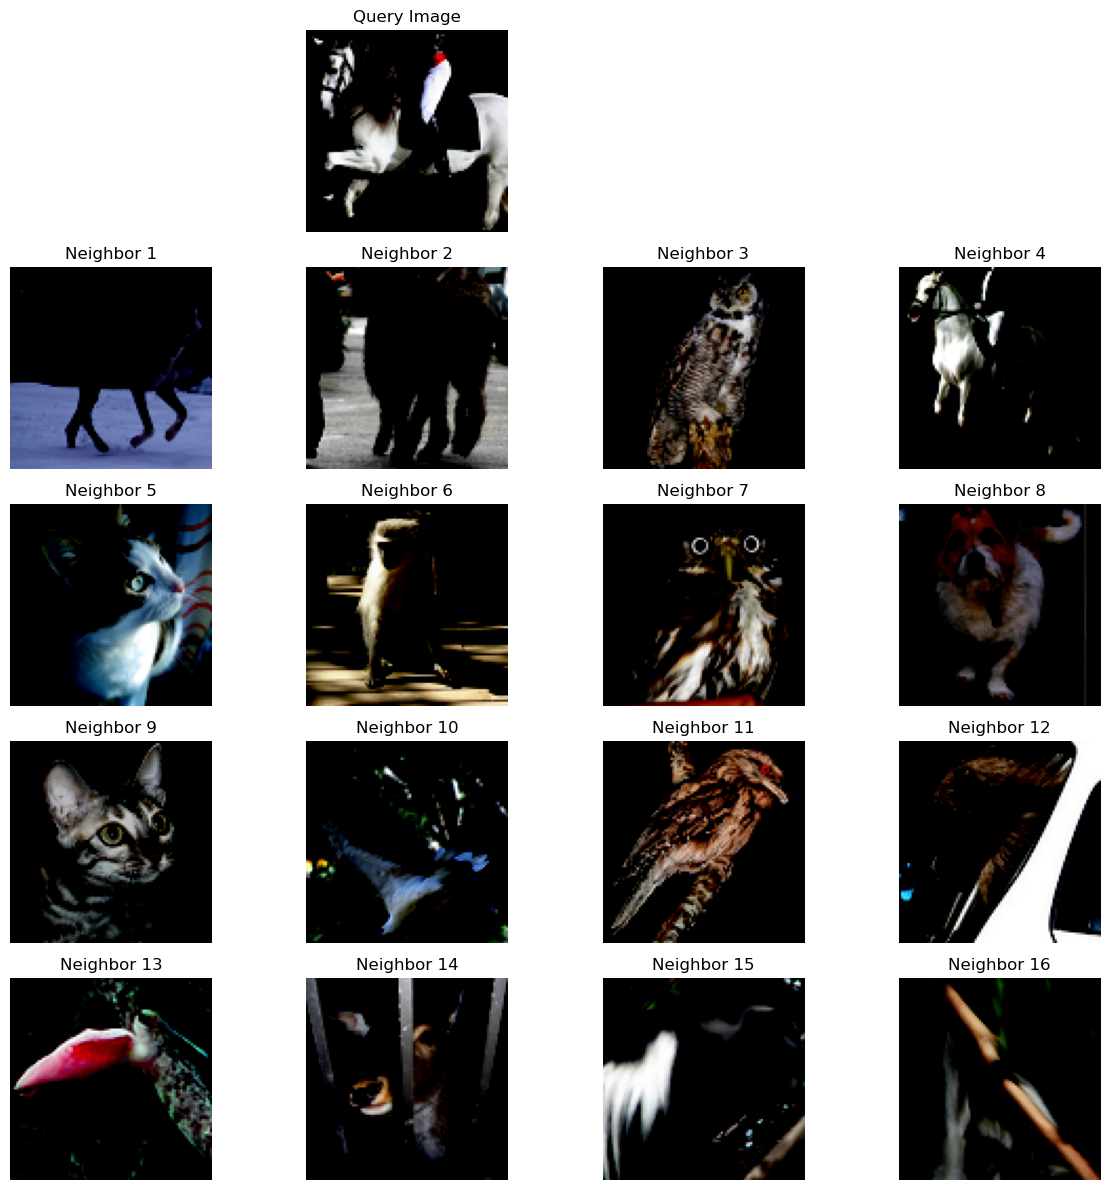

In [15]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to extract features for all images in a dataset using SimCLR
def extract_features(encoder, data_loader):
    encoder.eval()
    features = []
    images = []
    with torch.no_grad():
        for img_batch, _ in data_loader:
            img_batch = img_batch.to(device)
            feature = encoder.get_features(img_batch)  # Extract features directly
            features.append(feature.cpu())
            images.append(img_batch.cpu())
    return torch.cat(features), torch.cat(images)

# Function to find nearest neighbors in the feature space
def find_nearest_neighbors(encoder, data_loader, num_neighbors=16):
    features, images = extract_features(encoder, data_loader)
    features = F.normalize(features, p=2, dim=1)  # Normalize features for cosine similarity

    # Select a random image as the query
    query_idx = torch.randint(0, features.size(0), (1,)).item()
    query_feature = features[query_idx]

    # Compute cosine similarity between the query feature and all other features
    similarities = torch.mm(features, query_feature.unsqueeze(1)).squeeze(1)
    distances, indices = similarities.topk(num_neighbors + 1, largest=True)

    # Exclude the query itself from the neighbors list
    neighbors = indices[1:]  # Exclude the first one (query itself)
    return query_idx, neighbors

# Function to visualize the query image and its nearest neighbors with 90° rotation
def show_nearest_neighbors(encoder, data_loader, num_neighbors=16):
    query_idx, neighbors = find_nearest_neighbors(encoder, data_loader, num_neighbors)
    
    # Plot query image with 90° rotation to the right
    plt.figure(figsize=(12, 12))
    plt.subplot(5, 4, 2)
    rotated_query = data_loader.dataset[query_idx][0].permute(1, 2, 0).numpy()
    rotated_query = rotated_query.transpose(1, 0, 2)  # Rotate 90° right
    plt.imshow(rotated_query)
    plt.title("Query Image")
    plt.axis('off')

    # Plot neighbors with 90° rotation to the right
    for i, neighbor_idx in enumerate(neighbors):
        plt.subplot(5, 4, i + 5)  # Start plotting neighbors on the next row
        rotated_neighbor = data_loader.dataset[neighbor_idx][0].permute(1, 2, 0).numpy()
        rotated_neighbor = rotated_neighbor.transpose(1, 0, 2)  # Rotate 90° right
        plt.imshow(rotated_neighbor)
        plt.title(f"Neighbor {i + 1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Définir la transformation pour garantir que les images ont 3 canaux et sont normalisées
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir en tenseur avec la forme [C, H, W]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisation des canaux R, G, B
])

# Initialize dataset and data loader with transformations
data_dir = './stl10_binary'  # Update with actual path
dataset = STL10Dataset(data_dir, split='train', transform=transform)
data_loader = DataLoader(dataset, batch_size=64, shuffle=False)

# Initialize the SimCLR model
simclr_model = SimCLR(dataset='stl10', n_classes=4).to(device)

# Display nearest neighbors with 90° rotation
show_nearest_neighbors(simclr_model, data_loader, num_neighbors=16)


5- Apprendre au modèle à prédire la position relative d’un patch de l’image relativement à un patch requête

In [5]:
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def read_stl10_images(file_path):
    with open(file_path, 'rb') as f:
        images = np.fromfile(f, dtype=np.uint8)
        images = images.reshape(-1, 3, 96, 96)  # STL-10 images sont 96x96 RGB
        images = images.transpose(0, 2, 3, 1)  # Changer la forme à (N, H, W, C)
    return images

def read_stl10_labels(file_path):
    with open(file_path, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
    return labels


In [6]:
def extract_patches(image, patch_size=32):
    patches = []
    h, w, c = image.shape
    stride = patch_size
    for y in range(0, h - patch_size + 1, stride):
        for x in range(0, w - patch_size + 1, stride):
            patch = image[y:y + patch_size, x:x + patch_size, :]  # Gardez l'ordre (H, W, C)
            patches.append(patch)
    return np.array(patches)  # La forme sera (N, H, W, C)


In [7]:
import random

def create_patch_pairs(patches):
    num_patches = patches.shape[0]
    pairs = []
    labels = []

    # Il y a 8 positions possibles autour d'un patch central
    relative_positions = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),         (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]
    
    for i in range(num_patches):
        query_patch = patches[i]
        possible_targets = [j for j in range(num_patches) if j != i]
        target_patch_idx = random.choice(possible_targets)
        target_patch = patches[target_patch_idx]
        
        # Calculer la position relative
        dy = (target_patch_idx // 3) - (i // 3)
        dx = (target_patch_idx % 3) - (i % 3)
        position = (dy, dx)
        
        # Obtenir l'index de la position relative
        if position in relative_positions:
            label = relative_positions.index(position)
            pairs.append((query_patch, target_patch))
            labels.append(label)

    return np.array(pairs), np.array(labels)


Sur stl10

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F

# Charger les données
def read_stl10_images(file_path):
    with open(file_path, 'rb') as f:
        images = np.fromfile(f, dtype=np.uint8)
        images = images.reshape(-1, 3, 96, 96)
        images = images.transpose(0, 2, 3, 1)
    return images

def read_stl10_labels(file_path):
    with open(file_path, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

def extract_patches(image, patch_size=32):
    patches = []
    h, w, c = image.shape
    stride = patch_size
    for y in range(0, h - patch_size + 1, stride):
        for x in range(0, w - patch_size + 1, stride):
            patch = image[y:y + patch_size, x:x + patch_size, :]
            patches.append(patch)
    return np.array(patches)

def create_patch_pairs(patches):
    num_patches = patches.shape[0]
    pairs = []
    labels = []
    relative_positions = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),         (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]
    for i in range(num_patches):
        if i == 4:  # Skip central patch
            continue
        query_patch = patches[4]  # Always use central patch as query
        target_patch = patches[i]
        pairs.append((query_patch, target_patch))
        labels.append(i if i < 4 else i - 1)  # Adjust label index for skipping central patch
    return np.array(pairs), np.array(labels)

images = read_stl10_images('./stl10_binary/train_X.bin')
labels = read_stl10_labels('./stl10_binary/train_y.bin')

# Extraire les patches et créer des paires
all_query_patches = []
all_target_patches = []
all_labels = []
for img in images:
    patches = extract_patches(img)
    pairs, labels = create_patch_pairs(patches)
    query_patches, target_patches = zip(*pairs)  # Séparer les patches requêtes et cibles
    all_query_patches.append(query_patches)
    all_target_patches.append(target_patches)
    all_labels.append(labels)

# Convertir en tenseurs PyTorch
query_patches = torch.tensor(np.concatenate(all_query_patches), dtype=torch.float32).permute(0, 3, 1, 2).to(device)  # (N, C, H, W)
target_patches = torch.tensor(np.concatenate(all_target_patches), dtype=torch.float32).permute(0, 3, 1, 2).to(device)  # (N, C, H, W)
labels = torch.tensor(np.concatenate(all_labels), dtype=torch.long).to(device)

# Concaténer les patches requêtes et cibles sur la dimension des canaux (afin d'avoir un seul tenseur d'entrée)
pairs = torch.cat((query_patches, target_patches), dim=1)  # (N, 6, H, W)

# Créer le DataLoader
dataset = TensorDataset(pairs, labels)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)
print("Shape des paires de patches:", pairs.shape)  # Devrait être (N, 6, 32, 32)
print("Shape des labels:", labels.shape)  # Devrait être (N,)

# Définir le modèle
class CPCModel(nn.Module):
    def __init__(self):
        super(CPCModel, self).__init__()
        # Simplification du modèle
        self.conv1 = nn.Conv2d(6, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 32 * 32, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 8)  # 8 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

model = CPCModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Définir l'optimiseur et la fonction de perte
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Fonction pour calculer l'accuracy Top-1 et Top-5
def calculate_topk_accuracy(output, target, topk=(1, 5)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

# Entraîner le modèle avec tqdm
for epoch in range(10):
    model.train()
    total_loss = 0
    top1_acc, top5_acc = 0, 0

    progress_bar = tqdm(data_loader, desc=f"Epoch {epoch+1}", leave=False)
    for batch in progress_bar:
        x_batch, y_batch = batch
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        logits = model(x_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculer l'accuracy Top-1 et Top-5
        top1, top5 = calculate_topk_accuracy(logits, y_batch)
        top1_acc += top1.item()
        top5_acc += top5.item()

        # Mettre à jour la barre de progression avec la perte et l'accuracy
        progress_bar.set_postfix(loss=total_loss / len(data_loader), top1_acc=top1_acc / len(data_loader), top5_acc=top5_acc / len(data_loader))

    # Afficher les pertes et accuracies moyennes à la fin de chaque époque
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(data_loader)}, Top-1 Accuracy: {top1_acc / len(data_loader):.2f}%, Top-5 Accuracy: {top5_acc / len(data_loader):.2f}%")

# Évaluation du modèle sur un jeu de données de test
test_images = read_stl10_images('./stl10_binary/test_X.bin')
test_labels = read_stl10_labels('./stl10_binary/test_y.bin')

# Extraire les patches et créer des paires (de la même manière que pour le train)
all_query_patches = []
all_target_patches = []
all_labels = []
for img in test_images:
    patches = extract_patches(img)
    pairs, labels = create_patch_pairs(patches)
    query_patches, target_patches = zip(*pairs)
    all_query_patches.append(query_patches)
    all_target_patches.append(target_patches)
    all_labels.append(labels)

# Convertir en tenseurs PyTorch
query_patches = torch.tensor(np.concatenate(all_query_patches), dtype=torch.float32).permute(0, 3, 1, 2).to(device)
target_patches = torch.tensor(np.concatenate(all_target_patches), dtype=torch.float32).permute(0, 3, 1, 2).to(device)
labels = torch.tensor(np.concatenate(all_labels), dtype=torch.long).to(device)

# Concaténer les patches
test_pairs = torch.cat((query_patches, target_patches), dim=1)
test_dataset = TensorDataset(test_pairs, labels)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Évaluation
model.eval()
total_top1_acc, total_top5_acc = 0, 0
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        logits = model(x_batch)
        top1, top5 = calculate_topk_accuracy(logits, y_batch)
        total_top1_acc += top1.item()
        total_top5_acc += top5.item()

    avg_top1_acc = total_top1_acc / len(test_loader)
    avg_top5_acc = total_top5_acc / len(test_loader)

    print(f"Test Set - Top-1 Accuracy: {avg_top1_acc:.2f}%, Top-5 Accuracy: {avg_top5_acc:.2f}%")


Shape des paires de patches: torch.Size([40000, 6, 32, 32])
Shape des labels: torch.Size([40000])
cuda


Epoch 1, Loss: 2.018534628582001, Top-1 Accuracy: 26.87%, Top-5 Accuracy: 82.44%


Epoch 2, Loss: 1.5203139698266983, Top-1 Accuracy: 40.38%, Top-5 Accuracy: 92.00%


Epoch 3, Loss: 1.3214130958557129, Top-1 Accuracy: 48.72%, Top-5 Accuracy: 94.89%


Epoch 4, Loss: 1.111208362340927, Top-1 Accuracy: 56.78%, Top-5 Accuracy: 96.88%


Epoch 5, Loss: 0.9174708719730377, Top-1 Accuracy: 64.78%, Top-5 Accuracy: 98.02%


Epoch 6, Loss: 0.7498562092125416, Top-1 Accuracy: 71.30%, Top-5 Accuracy: 98.84%


Epoch 7, Loss: 0.6077776578634977, Top-1 Accuracy: 76.76%, Top-5 Accuracy: 99.22%


Epoch 8, Loss: 0.5190233162894845, Top-1 Accuracy: 79.94%, Top-5 Accuracy: 99.45%


Epoch 9, Loss: 0.4414687978982925, Top-1 Accuracy: 83.00%, Top-5 Accuracy: 99.57%


Epoch 10, Loss: 0.39534611850753426, Top-1 Accuracy: 84.87%, Top-5 Accuracy: 99.62%
Test Set - Top-1 Accuracy: 51.84%, Top-5 Accuracy: 95.62%


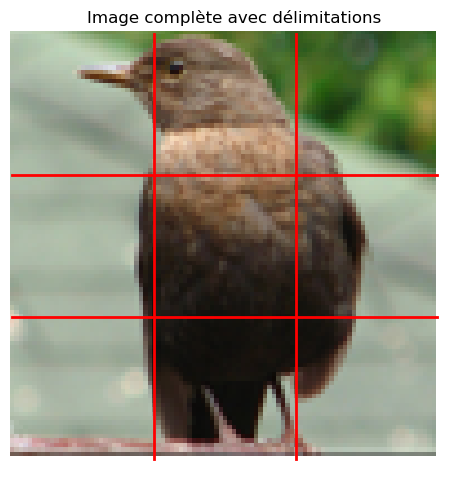

Précision des prédictions: 0.38


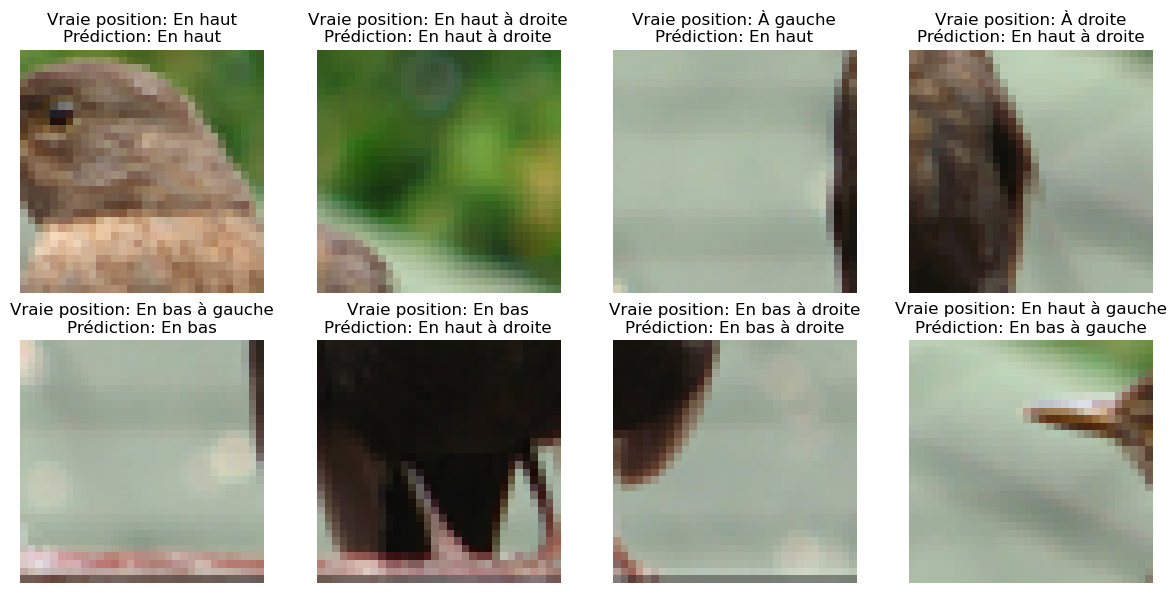

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Charger une image aléatoire de test
images = read_stl10_images('./stl10_binary/test_X.bin')
test_image = images[np.random.randint(0, len(images))]
test_image = np.rot90(test_image, k=-1) 

# Extraire les patches et ignorer le patch central
patches = extract_patches(test_image)  # 9 patches (3x3)
patches = patches.reshape(3, 3, *patches.shape[1:])  # Réorganiser en grille 3x3

# Ignorer le patch central
patches_ignoring_central = [
    (patches[i, j], (i, j)) for i in range(3) for j in range(3) if not (i == 1 and j == 1)
]

# Afficher l'image originale avec les délimitations des patches
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(test_image)
ax.set_title("Image complète avec délimitations")
ax.axis('off')

# Ajouter des lignes rouges pour délimiter les patches
h, w, _ = test_image.shape
for i in range(1, 3):
    # Lignes horizontales
    ax.plot([0, w], [i * (h // 3), i * (h // 3)], color='red', linewidth=2)
    # Lignes verticales
    ax.plot([i * (w // 3), i * (w // 3)], [0, h], color='red', linewidth=2)

plt.tight_layout()
plt.show()

# Créer des paires de patches (en ignorant le patch central)
def create_patch_pairs(patches):
    pairs = []
    labels = []
    for i, (patch, position) in enumerate(patches):
        for j, (target_patch, target_position) in enumerate(patches):
            if i != j:
                pairs.append((patch, target_patch))
                labels.append(target_position)
    return pairs, labels

pairs, relative_positions_true = create_patch_pairs(patches_ignoring_central)
query_patches, target_patches = zip(*pairs)

# Convertir en tenseurs PyTorch
# Convertir les patches de NumPy en tenseurs PyTorch et ajuster la forme
query_patches = torch.tensor(np.stack(query_patches), dtype=torch.float32).permute(0, 3, 1, 2)  # (N, C, H, W)
target_patches = torch.tensor(np.stack(target_patches), dtype=torch.float32).permute(0, 3, 1, 2)  # (N, C, H, W)

# Assurez-vous que la dimension est correcte avant la concaténation
pairs = torch.cat((query_patches, target_patches), dim=1)  # (N, 6, H, W)

# Faire des prédictions avec le modèle
model.eval()  # Mettre le modèle en mode évaluation
pairs = pairs.to(device)  # Assurez-vous que les données sont sur le même device que le modèle
with torch.no_grad():
    logits = model(pairs)
    predictions = torch.argmax(logits, dim=1)

# Dictionnaire des positions relatives possibles
relative_positions = [
    "En haut à gauche", "En haut", "En haut à droite",
    "À gauche",         "À droite",
    "En bas à gauche", "En bas", "En bas à droite"
]

# Afficher les patches utilisés pour les prédictions avec leurs résultats
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = ax.flatten()

# Assurez-vous qu'il y a suffisamment de patches disponibles
num_patches = min(8, len(target_patches), len(predictions))

correct_predictions = 0

def position_to_string(pos):
    i, j = pos
    if i == 0 and j == 0:
        return "En haut à gauche"
    elif i == 0 and j == 1:
        return "En haut"
    elif i == 0 and j == 2:
        return "En haut à droite"
    elif i == 1 and j == 0:
        return "À gauche"
    elif i == 1 and j == 2:
        return "À droite"
    elif i == 2 and j == 0:
        return "En bas à gauche"
    elif i == 2 and j == 1:
        return "En bas"
    elif i == 2 and j == 2:
        return "En bas à droite"

for i in range(num_patches):
    target_patch_np = target_patches[i].permute(1, 2, 0).numpy().astype(np.uint8)
    ax[i].imshow(target_patch_np)
    true_position_str = position_to_string(relative_positions_true[i])
    predicted_position_str = relative_positions[predictions[i]]
    ax[i].set_title(f"Vraie position: {true_position_str}\nPrédiction: {predicted_position_str}")
    ax[i].axis('off')
    
    # Compter les prédictions correctes
    if true_position_str == predicted_position_str:
        correct_predictions += 1

# Calculer la précision
precision = correct_predictions / num_patches
print(f"Précision des prédictions: {precision:.2f}")

# Masquer les axes inutilisés si moins de 8 patches sont disponibles
for i in range(num_patches, 8):
    ax[i].axis('off')

plt.tight_layout()
plt.show()


Sur cifar10

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
from torchvision import datasets, transforms

# Charger les données CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

def extract_patches(image, patch_size=10):
    patches = []
    c, h, w = image.shape
    stride = patch_size
    for y in range(0, h - patch_size + 1, stride):
        for x in range(0, w - patch_size + 1, stride):
            patch = image[:, y:y + patch_size, x:x + patch_size]
            patches.append(patch)
    return torch.stack(patches)

def create_patch_pairs(patches):
    num_patches = patches.shape[0]
    pairs = []
    labels = []
    relative_positions = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, -1),         (0, 1),
        (1, -1), (1, 0), (1, 1)
    ]
    for i in range(num_patches):
        if i == 4:  # Skip central patch
            continue
        query_patch = patches[4]  # Always use central patch as query
        target_patch = patches[i]
        pairs.append((query_patch, target_patch))
        labels.append(i if i < 4 else i - 1)  # Adjust label index for skipping central patch
    return torch.stack([torch.cat(pair, dim=0) for pair in pairs]), torch.tensor(labels)

# Extraire les patches et créer des paires pour le jeu de données d'entraîment
all_pairs = []
all_labels = []
for images, _ in train_loader:
    patches = extract_patches(images[0])
    pairs, labels = create_patch_pairs(patches)
    all_pairs.append(pairs)
    all_labels.append(labels)

pairs = torch.cat(all_pairs)
labels = torch.cat(all_labels)

# Créer le DataLoader
train_dataset = TensorDataset(pairs, labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Définir le modèle
class CPCModel(nn.Module):
    def __init__(self):
        super(CPCModel, self).__init__()
        # Simplification du modèle
        self.conv1 = nn.Conv2d(6, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 10 * 10, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 8)  # 8 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

model = CPCModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Définir l'optimiseur et la fonction de perte
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Fonction pour calculer l'accuracy Top-1 et Top-5
def calculate_topk_accuracy(output, target, topk=(1, 5)):
    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        _, pred = output.topk(maxk, 1, True, True)
        pred = pred.t()
        correct = pred.eq(target.view(1, -1).expand_as(pred))

        res = []
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size))
        return res

# Entraîner le modèle avec tqdm
for epoch in range(10):
    model.train()
    total_loss = 0
    top1_acc, top5_acc = 0, 0

    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False)
    for batch in progress_bar:
        x_batch, y_batch = batch
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        logits = model(x_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Calculer l'accuracy Top-1 et Top-5
        top1, top5 = calculate_topk_accuracy(logits, y_batch)
        top1_acc += top1.item()
        top5_acc += top5.item()

        # Mettre à jour la barre de progression avec la perte et l'accuracy
        progress_bar.set_postfix(loss=total_loss / len(train_loader), top1_acc=top1_acc / len(train_loader), top5_acc=top5_acc / len(train_loader))

    # Afficher les pertes et accuracies moyennes à la fin de chaque époque
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}, Top-1 Accuracy: {top1_acc / len(train_loader):.2f}%, Top-5 Accuracy: {top5_acc / len(train_loader):.2f}%")

# Évaluation du modèle sur un jeu de données de test
all_pairs = []
all_labels = []
for images, _ in test_loader:
    patches = extract_patches(images[0])
    pairs, labels = create_patch_pairs(patches)
    all_pairs.append(pairs)
    all_labels.append(labels)

test_pairs = torch.cat(all_pairs)
test_labels = torch.cat(all_labels)

test_dataset = TensorDataset(test_pairs, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Évaluation
model.eval()
total_top1_acc, total_top5_acc = 0, 0
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        logits = model(x_batch)
        top1, top5 = calculate_topk_accuracy(logits, y_batch)
        total_top1_acc += top1.item()
        total_top5_acc += top5.item()

    avg_top1_acc = total_top1_acc / len(test_loader)
    avg_top5_acc = total_top5_acc / len(test_loader)

    print(f"Test Set - Top-1 Accuracy: {avg_top1_acc:.2f}%, Top-5 Accuracy: {avg_top5_acc:.2f}%")


100%|██████████| 170498071/170498071 [22:00<00:00, 129070.60it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
cuda


Epoch 1, Loss: 1.4811739249038696, Top-1 Accuracy: 43.58%, Top-5 Accuracy: 91.88%


Epoch 2, Loss: 1.1068575989985465, Top-1 Accuracy: 59.40%, Top-5 Accuracy: 97.53%


Epoch 3, Loss: 0.9897699797725678, Top-1 Accuracy: 64.11%, Top-5 Accuracy: 98.31%


Epoch 4, Loss: 0.9195391147661209, Top-1 Accuracy: 66.71%, Top-5 Accuracy: 98.64%


Epoch 5, Loss: 0.8647669662666321, Top-1 Accuracy: 68.78%, Top-5 Accuracy: 98.87%


Epoch 6, Loss: 0.8221060944205523, Top-1 Accuracy: 70.36%, Top-5 Accuracy: 99.03%


Epoch 7, Loss: 0.788102842900157, Top-1 Accuracy: 71.60%, Top-5 Accuracy: 99.13%


Epoch 8, Loss: 0.7564275324350596, Top-1 Accuracy: 72.63%, Top-5 Accuracy: 99.24%


Epoch 9, Loss: 0.7312517672568559, Top-1 Accuracy: 73.58%, Top-5 Accuracy: 99.32%


Epoch 10, Loss: 0.7068572971960903, Top-1 Accuracy: 74.44%, Top-5 Accuracy: 99.39%
Test Set - Top-1 Accuracy: 77.58%, Top-5 Accuracy: 99.42%
